<a href="https://colab.research.google.com/github/divyam1464/GFG_GenerativeAI_and_ChatGPT/blob/main/GFG_Generative_AI_%26_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
# training and testing datasets and then loading the image datasets from the mnist
 (x_train, y_train), (x_test, y_test) = mnist.load_data()

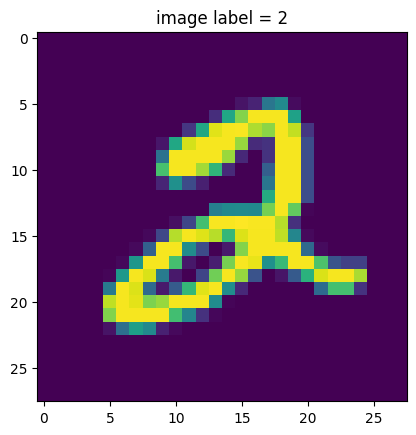

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title(f"image label = {y_train[5]}")
plt.show()